In [1]:
import json
import os
import pandas as pd
import seaborn as sns

In [2]:
CAM_DIR = "/mnt/md1/home/oriol/CAM/results/IRF4/CAM/ChIP-seq"

In [3]:
data = []
for label in ["T95R", "WT"]:
    d = f"{CAM_DIR}/{label}/predictions"
    for json_file in os.listdir(d):
        peaks = os.path.splitext(json_file)[0]
        with open(os.path.join(d, json_file)) as f:
            arr = json.load(f)
        for i, a in enumerate(arr):
            data.append([label, peaks, i, a])
df = pd.DataFrame(data, columns=["label", "peaks", "id", "score"])
df

,label,peaks,id,score
0,T95R,WT-unique,0,0.877963
1,T95R,WT-unique,1,0.000014
2,T95R,WT-unique,2,1.000000
3,T95R,WT-unique,3,0.546893
4,T95R,WT-unique,4,0.928475
...,...,...,...,...
136499,WT,T95R-WT-intersect,21781,0.999892
136500,WT,T95R-WT-intersect,21782,0.967314
136501,WT,T95R-WT-intersect,21783,0.000001
136502,WT,T95R-WT-intersect,21784,0.031766


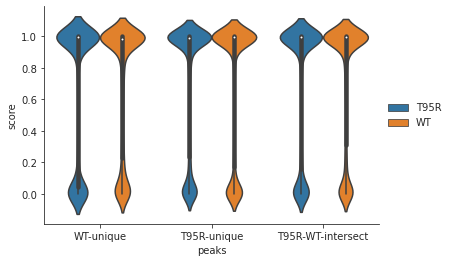

In [4]:
sns.set_style("ticks", rc={'figure.figsize':(11.7,8.27)})
ax = sns.violinplot(x="peaks", y="score", hue="label", data=df)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)
sns.despine()

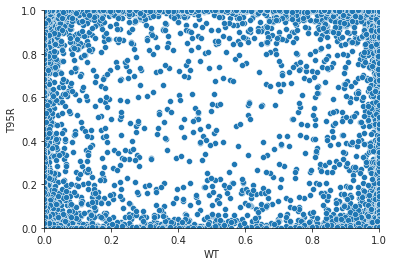

In [16]:
x = df[(df["label"] == "T95R") & ((df["peaks"] == "WT-unique"))].score.tolist()
y = df[(df["label"] == "WT") & ((df["peaks"] == "WT-unique"))].score.tolist()
ax = sns.scatterplot(x=x, y=y)
ax.set_xlabel("WT")
ax.set_ylabel("T95R")
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))
sns.despine()

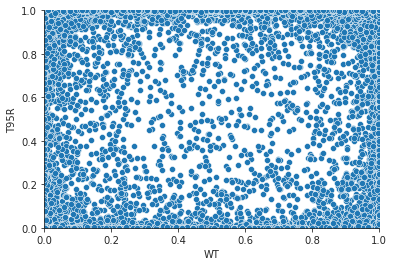

In [17]:
x = df[(df["label"] == "T95R") & ((df["peaks"] == "T95R-unique"))].score.tolist()
y = df[(df["label"] == "WT") & ((df["peaks"] == "T95R-unique"))].score.tolist()
ax = sns.scatterplot(x=x, y=y)
ax.set_xlabel("WT")
ax.set_ylabel("T95R")
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))
sns.despine()

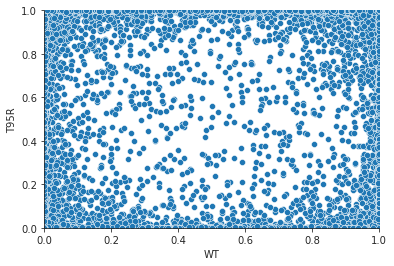

In [18]:
x = df[(df["label"] == "T95R") & ((df["peaks"] == "T95R-WT-intersect"))].score.tolist()
y = df[(df["label"] == "WT") & ((df["peaks"] == "T95R-WT-intersect"))].score.tolist()
ax = sns.scatterplot(x=x, y=y)
ax.set_xlabel("WT")
ax.set_ylabel("T95R")
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))
sns.despine()